In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("/data/morrisq/simranch/ALT/Telomere_hunter_res/TCGA/LGG_combined.csv")
print(df.head(5))

threshold_3 = df[df['repeat_threshold_used'] == 3]
threshold_4 = df[df['repeat_threshold_used'] == 4]
threshold_5 = df[df['repeat_threshold_used'] == 5]
threshold_6 = df[df['repeat_threshold_used'] == 6]


            PID               sample   total_reads  read_length  \
0  TCGA-HW-7486                tumor  2.018704e+09        101.0   
1  TCGA-HW-7486              control  1.866523e+09        101.0   
2  TCGA-HW-7486  log2(tumor/control)           NaN          NaN   
3  TCGA-HW-7486                tumor  2.018704e+09        101.0   
4  TCGA-HW-7486              control  1.866523e+09        101.0   

  repeat_threshold_set  repeat_threshold_used  tel_reads  intratel_reads  \
0                  4.0                    4.0   426629.0        201543.0   
1                  4.0                    4.0   435507.0        221175.0   
2                  NaN                    NaN        NaN             NaN   
3         6 per 100 bp                    6.0   171419.0        135114.0   
4         6 per 100 bp                    6.0   207926.0        172131.0   

  gc_bins_for_correction  total_reads_with_tel_gc  ...  \
0                  48-52              284728624.0  ...   
1                  48-52

In [13]:
def plot_threshold_bars(thresholds, column_name='tel_reads', figsize=(12, 6), 
                         colors=['lightsalmon', 'skyblue', 'lightcoral', 'lightgreen']):
    """
    Create a grouped bar plot for multiple thresholds across tumor and control samples.
    
    Parameters:
    -----------
    thresholds : list
        List of DataFrames, each representing a different threshold
    column_name : str, optional
        Name of the column to plot (default is 'tel_reads')
    figsize : tuple, optional
        Figure size (default is (12, 6))
    colors : list, optional
        List of colors for each threshold's bars
    """
    # Create figure and axis
    plt.figure(figsize=figsize)
    
    # Set bar width
    bar_width = 0.2  # Width to accommodate multiple bars
    
    # Create positions for bars
    x = np.arange(2)  # 2 categories: tumor and control
    
    # Ensure we have enough colors
    colors = colors[:len(thresholds)]
    
    # Bar plotting and label creation
    for i, (threshold, color) in enumerate(zip(thresholds, colors)):
        # Calculate bar position
        offset = (i - len(thresholds)/2 + 0.5) * bar_width
        
        # Extract values for tumor and control
        tumor_val = threshold[threshold['sample']=='tumor'][column_name].iloc[0]
        control_val = threshold[threshold['sample']=='control'][column_name].iloc[0]
        
        # Plot bars
        plt.bar(x + offset, 
                [tumor_val, control_val], 
                bar_width, 
                label=f'Threshold {3+i}', 
                color=color)
        
        # Add value labels
        for j, v in enumerate([tumor_val, control_val]):
            plt.text(x[j] + offset, v, str(int(v)), 
                    ha='center', va='bottom')
    
    # Customize the plot
    plt.xlabel('Sample Type', fontsize=12)
    plt.ylabel(f'Number of {column_name.replace("_", " ").title()}', fontsize=12)
    plt.title(f'{column_name.replace("_", " ").title()} Comparison: Different Thresholds', fontsize=14)
    plt.xticks(x, ['Tumor', 'Control'])
    plt.legend()
    
    # Add grid for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sequence_comparison(df, column_suffix='_arbitrary_context_norm_by_intratel_reads', 
                              thresholds=[4, 6], sample_type='tumor', 
                              figsize=(15, 8), colors=None,
                              title_fontsize=10, xlabel_fontsize=8, ylabel_fontsize=10,
                              tick_fontsize=8, legend_fontsize=8, 
                              value_label_fontsize=6):
    """
    Create a bar plot comparing sequence types across different thresholds for a specific sample type.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing the data
    column_suffix : str, optional
        Suffix of the columns to plot (default is '_arbitrary_context_norm_by_intratel_reads')
    thresholds : list, optional
        List of thresholds to compare (default is [4, 6])
    sample_type : str, optional
        Type of sample to plot (default is 'tumor')
    figsize : tuple, optional
        Size of the figure (default is (15, 8))
    colors : list, optional
        List of colors for the bars. If None, a default color palette is used.
    title_fontsize : int, optional
        Font size for the title (default is 10)
    xlabel_fontsize : int, optional
        Font size for x-axis label (default is 8)
    ylabel_fontsize : int, optional
        Font size for y-axis label (default is 10)
    tick_fontsize : int, optional
        Font size for tick labels (default is 8)
    legend_fontsize : int, optional
        Font size for legend (default is 8)
    value_label_fontsize : int, optional
        Font size for value labels on top of bars (default is 6)
    
    Returns:
    --------
    matplotlib.figure.Figure
        The created figure object for further customization if needed
    """
    # Create figure and axis with larger size for better readability
    fig, ax = plt.subplots(figsize=figsize)
    
    # Get the sequence columns
    sequence_columns = [col for col in df.columns if col.endswith(column_suffix)]
    sequence_types = [col.replace(column_suffix, '') for col in sequence_columns]
    
    # Default color palette if not provided
    if colors is None:
        colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']
    
    # Ensure we have enough colors
    colors = colors[:len(thresholds)]
    
    # Set positions for the bars
    x = np.arange(len(sequence_types))
    width = 0.35 / len(thresholds)  # Adjust width based on number of thresholds
    
    # Store bars for legend and labeling
    all_bars = []
    
    # Create bars for each threshold
    for i, threshold in enumerate(thresholds):
        # Get data for the specific threshold and sample type
        threshold_data = df[(df['repeat_threshold_used'] == threshold) & (df['sample'] == sample_type)].iloc[0]
        
        # Calculate bar position
        bar_offset = width * (i - (len(thresholds) - 1) / 2)
        
        # Create bars
        bars = ax.bar(x + bar_offset, 
                      [threshold_data[f'{seq}{column_suffix}'] for seq in sequence_types], 
                      width, 
                      label=f'Threshold {threshold}', 
                      color=colors[i])
        all_bars.append(bars)
        
        # Add value labels on top of each bar
        for rect in bars:
            height = rect.get_height()
            ax.annotate(f'{height:.3f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=value_label_fontsize)
    
    # Customize the plot
    ax.set_ylabel(f'Normalized Read Counts ({column_suffix.replace("_", " ").strip()})', 
                  fontsize=ylabel_fontsize)
    ax.set_title(f'{column_suffix.replace("_", " ").strip()} Comparison', 
                 fontsize=title_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(sequence_types, rotation=45, ha='right', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    
    # Customize legend
    ax.legend(fontsize=legend_fontsize)
    
    # Add grid for readability
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return fig

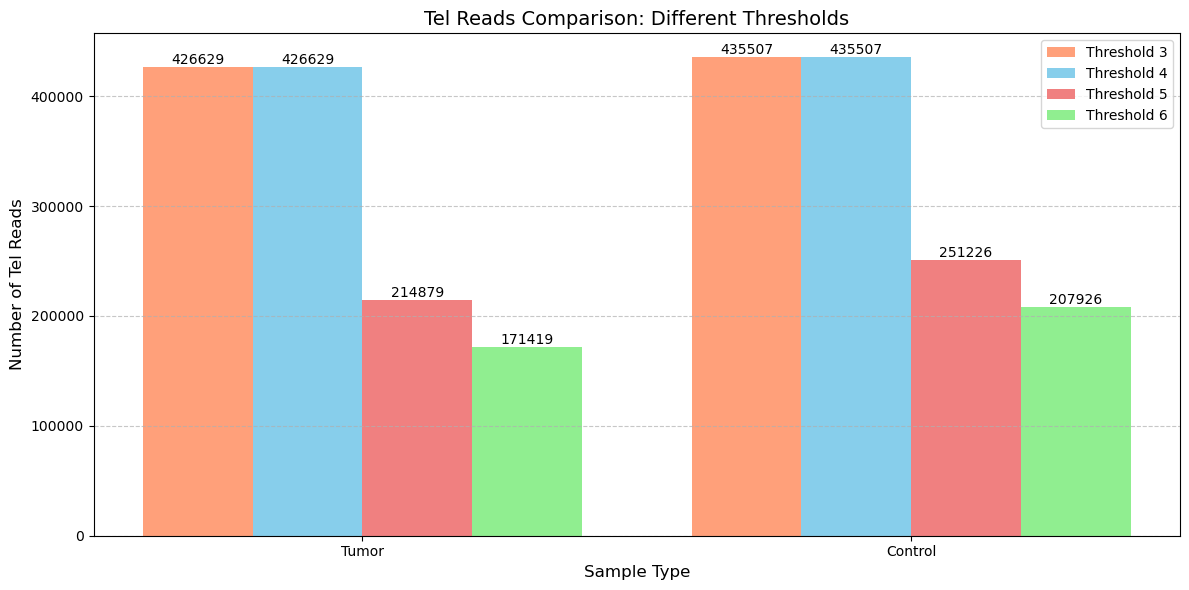

In [15]:
plot_threshold_bars([threshold_3, threshold_4, threshold_5, threshold_6], 
                    column_name='tel_reads')

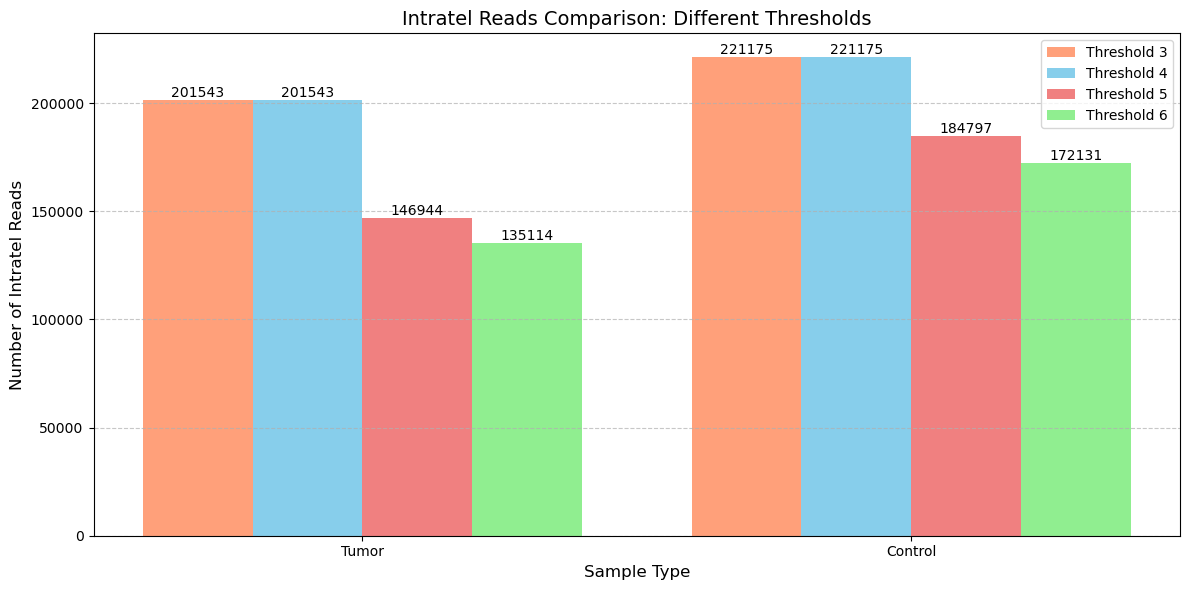

In [16]:
plot_threshold_bars([threshold_3, threshold_4, threshold_5, threshold_6], 
                    column_name='intratel_reads')

In [17]:
# Print summary statistics
print("\nSummary Statistics:")
print("\nTelomere Reads:")
print("Threshold 4:")
print(f"Tumor: {int(threshold_4[threshold_4['sample']=='tumor']['tel_reads'].iloc[0])}")
print(f"Control: {int(threshold_4[threshold_4['sample']=='control']['tel_reads'].iloc[0])}")
print("\nThreshold 6:")
print(f"Tumor: {int(threshold_6[threshold_6['sample']=='tumor']['tel_reads'].iloc[0])}")
print(f"Control: {int(threshold_6[threshold_6['sample']=='control']['tel_reads'].iloc[0])}")

print("\nIntratelomeric Reads:")
print("Threshold 4:")
print(f"Tumor: {int(threshold_4[threshold_4['sample']=='tumor']['intratel_reads'].iloc[0])}")
print(f"Control: {int(threshold_4[threshold_4['sample']=='control']['intratel_reads'].iloc[0])}")
print("\nThreshold 6:")
print(f"Tumor: {int(threshold_6[threshold_6['sample']=='tumor']['intratel_reads'].iloc[0])}")
print(f"Control: {int(threshold_6[threshold_6['sample']=='control']['intratel_reads'].iloc[0])}")


Summary Statistics:

Telomere Reads:
Threshold 4:
Tumor: 426629
Control: 435507

Threshold 6:
Tumor: 171419
Control: 207926

Intratelomeric Reads:
Threshold 4:
Tumor: 201543
Control: 221175

Threshold 6:
Tumor: 135114
Control: 172131


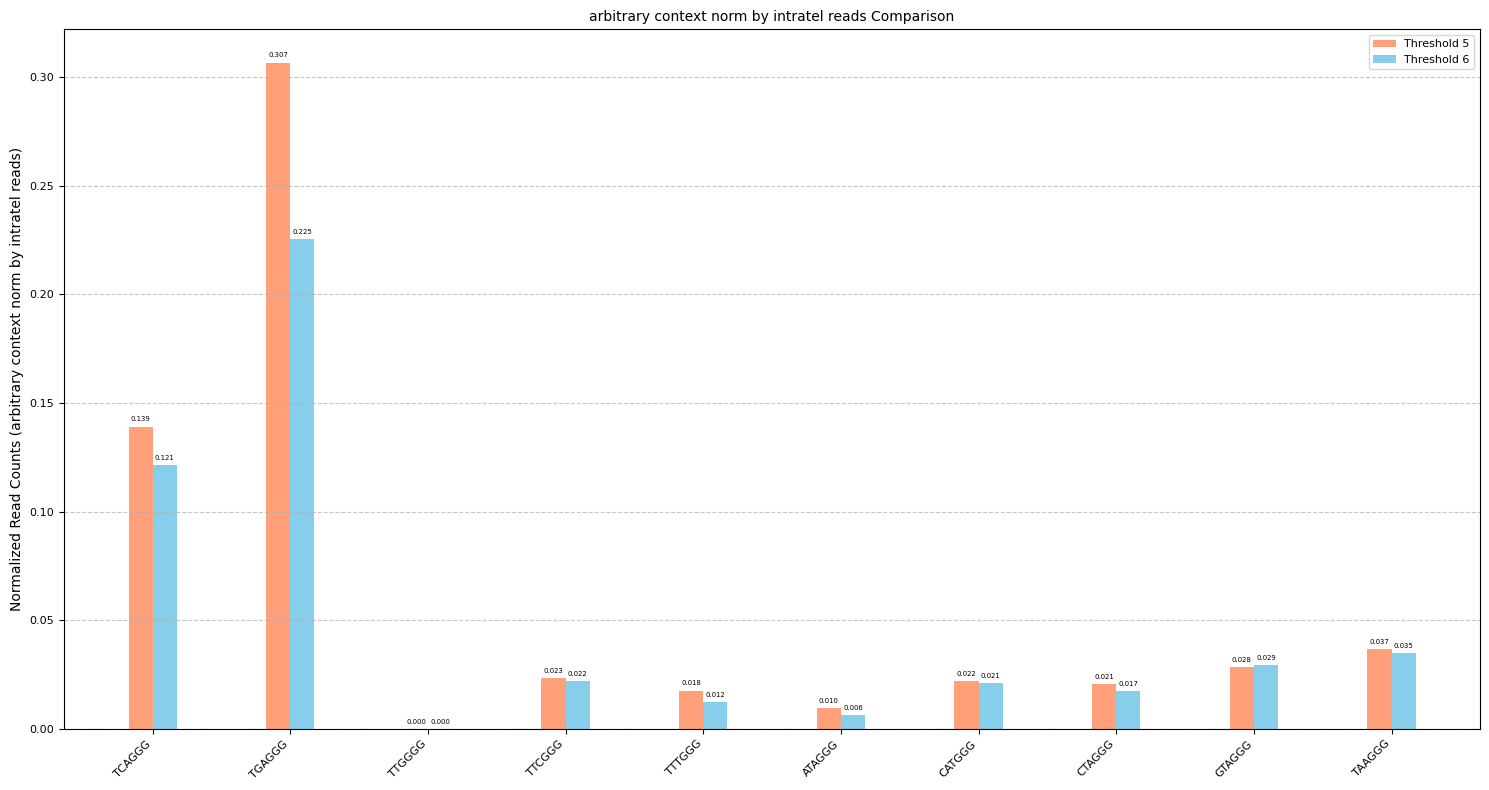

In [21]:
# Custom colors and column suffix
fig = plot_sequence_comparison(df, 
                               thresholds=[5,6],
                               column_suffix='_arbitrary_context_norm_by_intratel_reads', 
                               colors=['lightsalmon', 'skyblue', 'lightcoral', 'lightgreen'],value_label_fontsize=5)